<a href="https://colab.research.google.com/github/HabibaHani/ClassificationApp/blob/main/Forest_Fire_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fire Prediction with Artificial Neural Network

classification is used to predict a label and regression is used to predict a quantity. This simply means that a classification problem generally predicts a discrete label and outputs a prediction probability while regression will predict a continuous quantity and provide a value.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
#from scikitplot.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.base import clone

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv ('/content/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


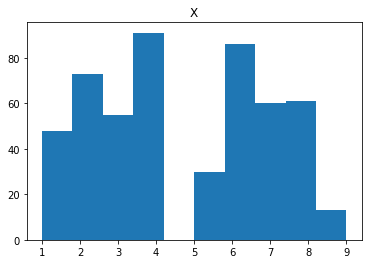

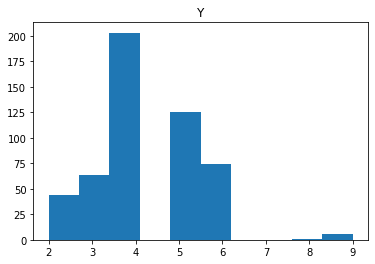

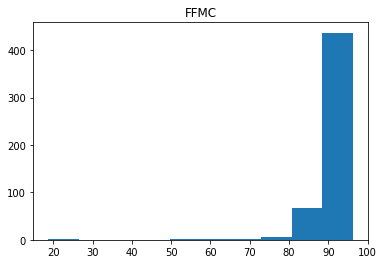

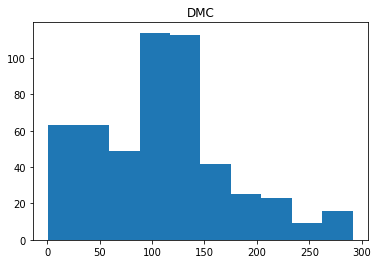

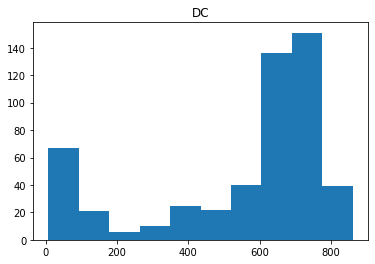

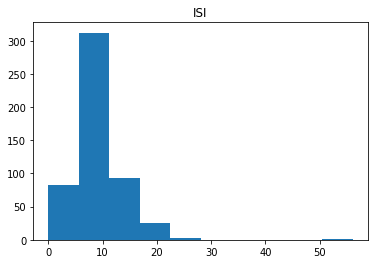

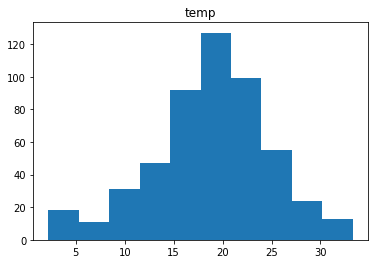

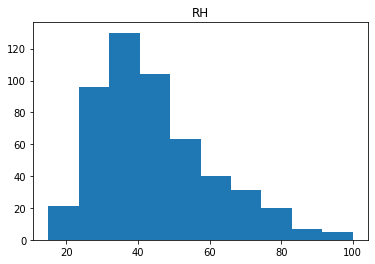

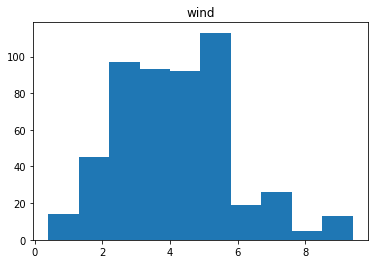

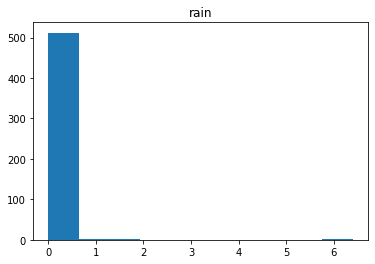

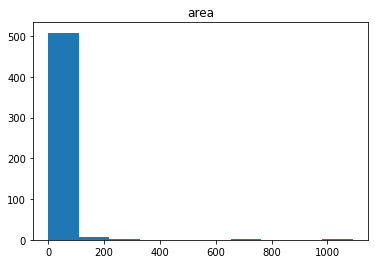

In [3]:
num_feature = data.columns[data.dtypes!='object']

def my_plot(feature):
    plt.hist(data[feature])
    plt.title(feature)
    plt.show()
        
for i in num_feature:
    my_plot(i)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: ignored

In [5]:
pip install scikit-learn==0.20.4

     |████████████████████████████████| 5.4MB 3.8MB/s 
ERROR: umap-learn 0.5.0 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.20.4 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Data Cleaning and Preprocessing

In [6]:
# Importing the libraries
import numpy as np
import pandas as pd

# Encoding 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
# Importing the dataset
dataset = pd.read_csv ('/content/forestfires.csv')
#Getting Independent and Dependent Features
X = dataset.iloc[:, 0:12].values # independent
y = dataset.iloc[:, 12].values # dependent variable

In [9]:
X

array([[7, 5, 'mar', ..., 51, 6.7, 0.0],
       [7, 4, 'oct', ..., 33, 0.9, 0.0],
       [7, 4, 'oct', ..., 33, 1.3, 0.0],
       ...,
       [7, 4, 'aug', ..., 70, 6.7, 0.0],
       [1, 4, 'aug', ..., 42, 4.0, 0.0],
       [6, 3, 'nov', ..., 31, 4.5, 0.0]], dtype=object)

In [10]:
y

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

### Classification


In [ ]:
#Convert to Acres then Classify Size
for i in range(0, len(y)):
    y[i] = (y[i]*2.47)
    if y[i] < 1.0:
        y[i] = 1
    elif y[i] < 10.0:
        y[i] = 2
    elif y[i] < 100.0:
        y[i] = 3
    elif y[i] < 300.0:
        y[i] = 4
    elif y[i] < 1000.0:
        y[i] = 5
    elif y[i] < 5000.0:
        y[i] = 6
    else:
        y[i] = 7

In [ ]:
# Encoding categorical data for independent variables 

#For month
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])

#For weekday
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) 

In [ ]:
X

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ("month",        # Just a name
         OneHotEncoder(), # The transformer class
         [2]            # The column(s) to be applied on.
         )
    ], remainder='passthrough'
)
X = transformer.fit_transform(X[:, 1:])

In [ ]:
X[1]

In [ ]:
#dummy variable for month

onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 

#dummy variable for week
onehotencoder = OneHotEncoder(categorical_features = [13])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap

In [ ]:
X[1]

In [ ]:
# Encoding For Classification
from keras.utils import np_utils
y = np_utils.to_categorical(y)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
# Feature Scaling to optimize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
'''
    Creating the ANN
'''
# Importing the Keras libraries and packages to use Tensor Flow Backend
import keras
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
# Initializing the ANN with sequence of layers (Could use a Graph)
#Classifier Model
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
# Adding the hidden layers
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
# Probability for the outcome 
'''Classification'''
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))
# Compiling the ANN
'''Classification'''
#Another Option: binary_crossentropy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)

In [ ]:
from sklearn.metrics import confusion_matrix

# https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045

In [ ]:
confusion_matrix(y_true, y_pred)

### Regression

In [ ]:
# Importing the Keras libraries and packages to use Tensor Flow Backend
import keras
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
# Initializing the ANN with sequence of layers (Could use a Graph)
#Classifier Model
classifier = Sequential()
# Adding the input layer and the first hidden layer 
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
# Adding the hidden layers
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
'''Regression'''
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 5, epochs = 500)

## Feature Evaluation and Dimensionality Reduction


In [ ]:
#Evaluate statistical significance with Backward Elimination
import statsmodels.formula.api as sm
import statsmodels.api as sm


#517 rows in X
X = np.append(arr = np.ones((517, 1)).astype(int), values = X, axis = 1)


#Select all Features
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
#View results and remove the highest P-value from X-Opt and repeat

In [ ]:
def backwardElimination(x, sl):
        numVars = len(x[0])
        for i in range(0, numVars):
            classifier_OLS = sm.OLS(y, x).fit()
            maxVar = max(classifier_OLS.pvalues).astype(float)
            if maxVar > sl:
              for j in range(0, numVars - i):
                  if (classifier_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
        return x
#Significance Level = 15%


In [ ]:
SL = 0.15
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]
X_Modeled = backwardElimination(X_opt, SL)
regressor_OLS = sm.OLS(endog = y, exog = X_Modeled).fit()
regressor_OLS.summary()

## PCA

In [ ]:
X_train_C = X_train
X_test_C = X_test

In [ ]:
#PCA Dimensionality Reduction
from sklearn.decomposition import PCA


pca = PCA(n_components = None) #Replace none with 2
X_train_C = pca.fit_transform(X_train_C)
X_test_C = pca.transform(X_test_C)

explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

## Dropout

In [ ]:
# Importing the Keras libraries and packages to use Tensor Flow Backend
import keras
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
# Initializing the ANN with sequence of layers (Could use a Graph)
#Classifier Model
classifier = Sequential()
# Adding the input layer and the first hidden layer 
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
# Adding the hidden layers
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
'''Regression'''
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#BUILD NEW MODEL
#Using Modifications
from keras.layers import Dropout #For Layers of ANN

classifier = Sequential()
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 25, epochs = 100)




In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

## Paramters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
'''CLASSIFICATION'''
#Avoid: ValueError: Classification metrics can’t handle a mix of continuous-multioutput and binary targets
dataset = pd.read_csv ('/content/forestfires.csv')
y = dataset.iloc[:, 12].values # dependent variable
for i in range(0, len(y)):
   y[i] = (y[i]*2.47)
   if y[i] < 100.0:
      y[i] = 0
   else:
      y[i] = 1
y_Corrected = y.astype(int)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y_Corrected, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Tuning For Epochs, Batch Size, Optimizer
def build_classifier(optimizer):
      classifier = Sequential()
      classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
      classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
      classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
      classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'sigmoid'))
      classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
      return classifier


classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 16, 32], 'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print('Best Parameters: %s' % best_parameters)
print('Best Accuracy: %s' % best_accuracy)




#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#epochs = [10, 50, 100]

#param_grid = dict(epochs=epochs, optimizer=optimizer)

#Kmodel = KerasClassifier(build_fn=build_classifier, verbose=1)
#grid = GridSearchCV(estimator=Kmodel, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='boolean')
#grid_result = grid.fit(X_train, Y_train)